This project aims to analyze employee data to identify key factors influencing attrition and build a predictive model that can forecast which employees are most likely to leave the organization. By leveraging historical HR data (such as job role, department, satisfaction levels, income, and work-life balance), the goal is to provide actionable insights that support HR decision-making and improve employee retention strategies in a pharmaceutical setting.



In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import plotly.express as px

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Loading the edited file since original file has no missing values. So created a file of missing values.

In [6]:
df_missing = pd.read_csv(("C:\\Users\\joeja\\OneDrive\\Desktop\\WA_Fn-UseC_-HR-Employee-Attrition1.csv"))

In [7]:
df_missing

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,NaN,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10.0,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7.0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8.0,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6.0,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17.0,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,NaN,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6.0,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17.0,3,2,9,6,0,8


In [7]:
print("Shape of the dataset:", df_missing.shape)

Shape of the dataset: (1470, 35)


In [8]:
print("Data types of each column:\n")
print(df_missing.dtypes)

Data types of each column:

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome               float64
MonthlyRate                   int64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64


In [10]:
df_missing.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,NaN,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10.0,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7.0,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8.0,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6.0,3,3,2,2,2,2


In [11]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1396 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [12]:
df_missing.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1396.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.332378,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.819091,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


2. Data Pre-processing

In this section, we clean and prepare the data for analysis and modeling. This includes handling missing values, removing duplicates, fixing data types, creating new features, and filtering or aggregating data where necessary.


In [13]:
df_missing.isnull().sum()

Age                          0
Attrition                    0
BusinessTravel              74
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                     74
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome               74
MonthlyRate                  0
NumCompaniesWorked          74
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears           74
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

Handle missing numeric values using Mean

In [14]:
df_missing['MonthlyIncome'] = df_missing['MonthlyIncome'].fillna(df_missing['MonthlyIncome'].mean())
df_missing['TotalWorkingYears'] = df_missing['TotalWorkingYears'].fillna(df_missing['TotalWorkingYears'].mean())
df_missing['NumCompaniesWorked'] = df_missing['NumCompaniesWorked'].fillna(df_missing['NumCompaniesWorked'].mean())

Handle missing categorical values using mode

In [15]:
df_missing['BusinessTravel'] = df_missing['BusinessTravel'].fillna(df_missing['BusinessTravel'].mode()[0])
df_missing['JobRole'] = df_missing['JobRole'].fillna(df_missing['JobRole'].mode()[0])

2.2 Removing Duplicates

In [16]:
df_missing.duplicated().sum()

0

In [17]:
df_missing.drop_duplicates(inplace=True)

2.3 Correcting Data Types

We verify and correct data types, especially for categorical columns that may have been incorrectly typed as object or numeric types.

In [18]:
cat_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 
            'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

In [19]:
for col in cat_cols:
    df_missing[col] = df_missing[col].astype('category')

In [20]:
df_missing.dtypes

Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeCount                  int64
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                float64
MonthlyRate                    int64
NumCompaniesWorked           float64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StandardHours                  int64
S

2.4 Creating Derived Columns

We create additional columns that may be useful in modeling. For example, we derive a feature `YearsInSameCompany` to represent employee loyalty.

In [21]:
df_missing['YearsInSameCompany'] = df_missing['YearsAtCompany'] - df_missing['YearsSinceLastPromotion']

In [22]:
df_missing['YearsInSameCompany'] = df_missing['YearsInSameCompany'].apply(lambda x: max(x, 0))

2.5 Filtering or Aggregating Data

We can filter the data if needed (e.g., removing test entries or irrelevant roles). For example, we’ll remove employees with EmployeeCount = 0 or StandardHours ≠ 80 if such inconsistencies exist.

In [24]:
df_missing = df_missing[df_missing['EmployeeCount'] != 0]
df_missing = df_missing[df_missing['StandardHours'] == 80]

In [23]:
df_missing

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsInSameCompany
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,11.332378,0,1,6,4,0,5,6
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10.000000,3,3,10,7,1,7,9
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7.000000,3,3,0,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8.000000,3,3,8,7,3,0,5
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6.000000,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,80,1,17.000000,3,3,5,2,0,3,5
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,80,1,11.332378,5,3,7,7,1,7,6
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,80,1,6.000000,0,3,6,2,0,3,6
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,80,0,17.000000,3,2,9,6,0,8,9


In [25]:
df_missing.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

 Exploratory Data Analysis (EDA)


3.1 Univariate Analysis

We begin by analyzing the distribution of individual variables. This includes numerical variables (e.g., Age, MonthlyIncome) and categorical variables (e.g., JobRole, Department).

In [26]:
sns.set(style="whitegrid")

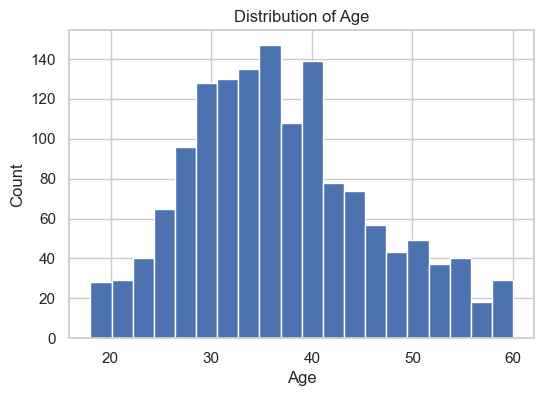

In [27]:
# Numerical Distribution
df_missing['Age'].hist(bins=20, figsize=(6,4))
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

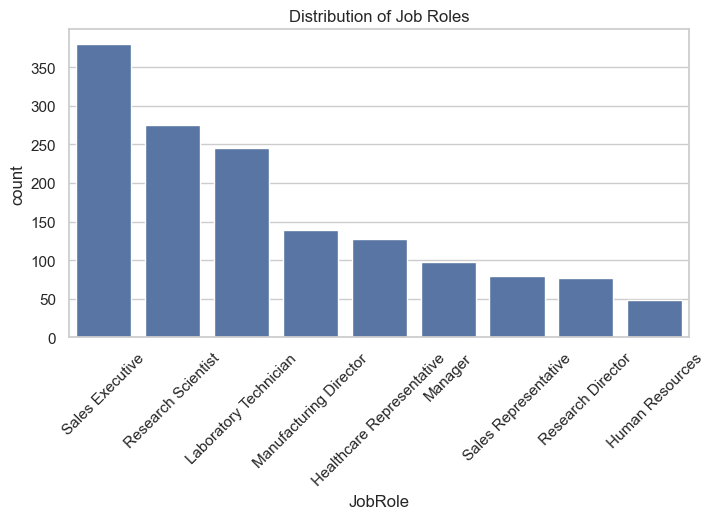

In [28]:
# Countplot for a categorical variable
plt.figure(figsize=(8,4))
sns.countplot(data=df_missing, x='JobRole', order=df_missing['JobRole'].value_counts().index)
plt.title('Distribution of Job Roles')
plt.xticks(rotation=45)
plt.show()

Conclusion (Univariate Analysis)

- Age distribution is fairly balanced, with a slight concentration between 30–40 years.
- Job roles are unevenly distributed, with roles like Sales Executive and Research Scientist being more common.
- No obvious data quality issues (e.g., zero-only columns or extreme outliers) are visible at this stage.

3.2 Bivariate Analysis

We explore how features relate to each other, especially in relation to the target variable `Attrition`. This helps identify potential predictors.

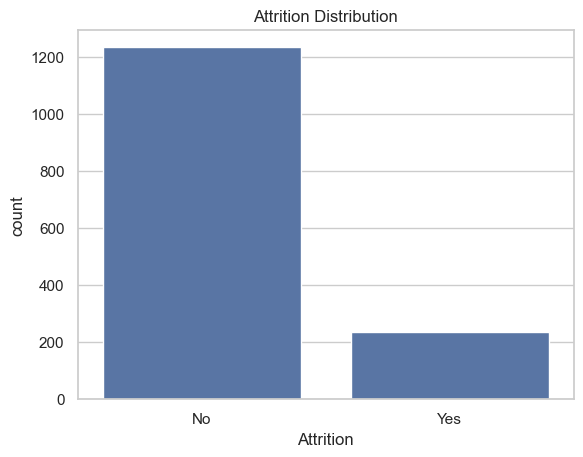

In [29]:
# Attrition count
sns.countplot(data=df_missing, x='Attrition')
plt.title('Attrition Distribution')
plt.show()

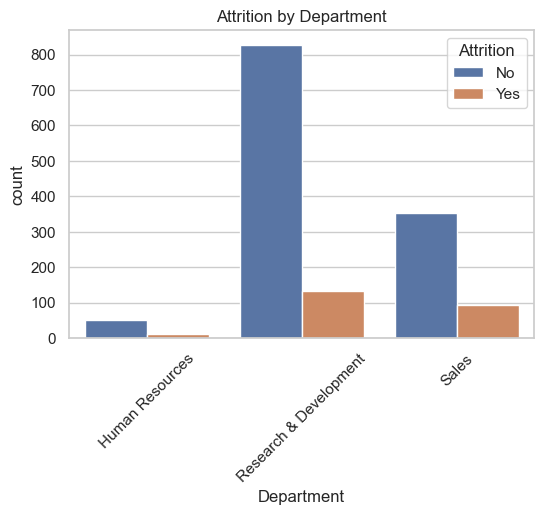

In [30]:
# Attrition by Department
plt.figure(figsize=(6,4))
sns.countplot(data=df_missing, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

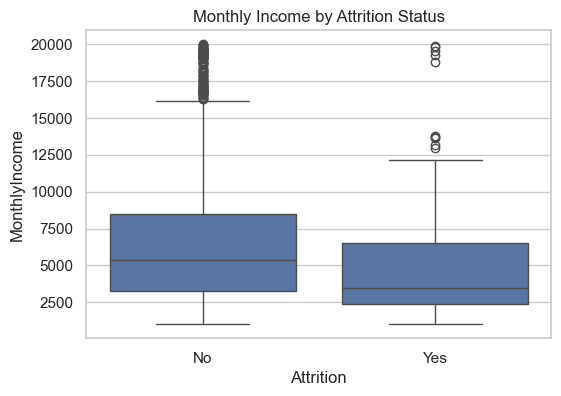

In [31]:
# Monthly Income vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(data=df_missing, x='Attrition', y='MonthlyIncome')
plt.title('Monthly Income by Attrition Status')
plt.show()

Conclusion (Bivariate Analysis)

- Attrition appears higher in certain departments such as Sales and Human Resources.
- Employees with lower Monthly Income tend to have higher attrition rates.
- Overtime and attrition are positively correlated — employees working overtime are more likely to leave.

3.3 Multivariate Analysis

We analyze the interaction of multiple variables simultaneously to understand deeper patterns — for example, how Job Role and OverTime together affect Attrition.

In [32]:
# Crosstab of Job Role vs OverTime with Attrition
pd.crosstab(index=df_missing['JobRole'], columns=[df_missing['OverTime'], df_missing['Attrition']])

OverTime                    No     Yes    
Attrition                   No Yes  No Yes
JobRole                                   
Healthcare Representative   85   7  35   0
Human Resources             30   7   7   5
Laboratory Technician      159  29  29  29
Manager                     70   1  23   4
Manufacturing Director      96   6  33   4
Research Director           53   1  22   1
Research Scientist         172  14  59  30
Sales Executive            237  30  73  40
Sales Representative        42  15   8  14

Conclusion (Multivariate Analysis)

- Certain combinations like "Sales Executive + Overtime = High Attrition" stand out.
- This suggests that HR strategy should focus not only on single features but also on role-based working conditions.

3.4 GroupBy and Pivot Tables

These help in summarizing data by department, job level, or satisfaction scores to find trends in attrition.

In [33]:
# Average attrition by department
print(df_missing.groupby('Department', observed=False)['Attrition'].value_counts(normalize=True).unstack())

Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278


In [34]:
pivot_income = pd.pivot_table(df_missing, values='MonthlyIncome', 
index='JobRole', columns='Attrition', aggfunc='mean', observed=False)
pivot_income

Attrition,No,Yes
JobRole,,
Healthcare Representative,7500.352973,9204.294208
Human Resources,4309.055661,4127.754955
Laboratory Technician,3427.012536,3208.797204
Manager,16810.001918,15727.411891
Manufacturing Director,7344.460130,7329.111891
Research Director,15297.510630,19395.500000
Research Scientist,3429.184907,3014.366339
Sales Executive,6744.693583,6674.260540
Sales Representative,2940.942378,2452.277912


Conclusion (GroupBy & Pivot)

- Pivot tables show that average Monthly Income tends to be lower for employees who left, across most job roles.
- Department-level analysis reveals that some business units have higher attrition proportions, highlighting areas needing deeper HR engagement.

3.5 Correlation Analysis

We calculate the correlation matrix for numeric variables to see which ones move together. This helps with feature selection later.

In [35]:
# Only numeric columns
numeric_df = df_missing.select_dtypes(include=['int64', 'float64'])

In [36]:
# Correlation matrix
corr_matrix = numeric_df.corr()

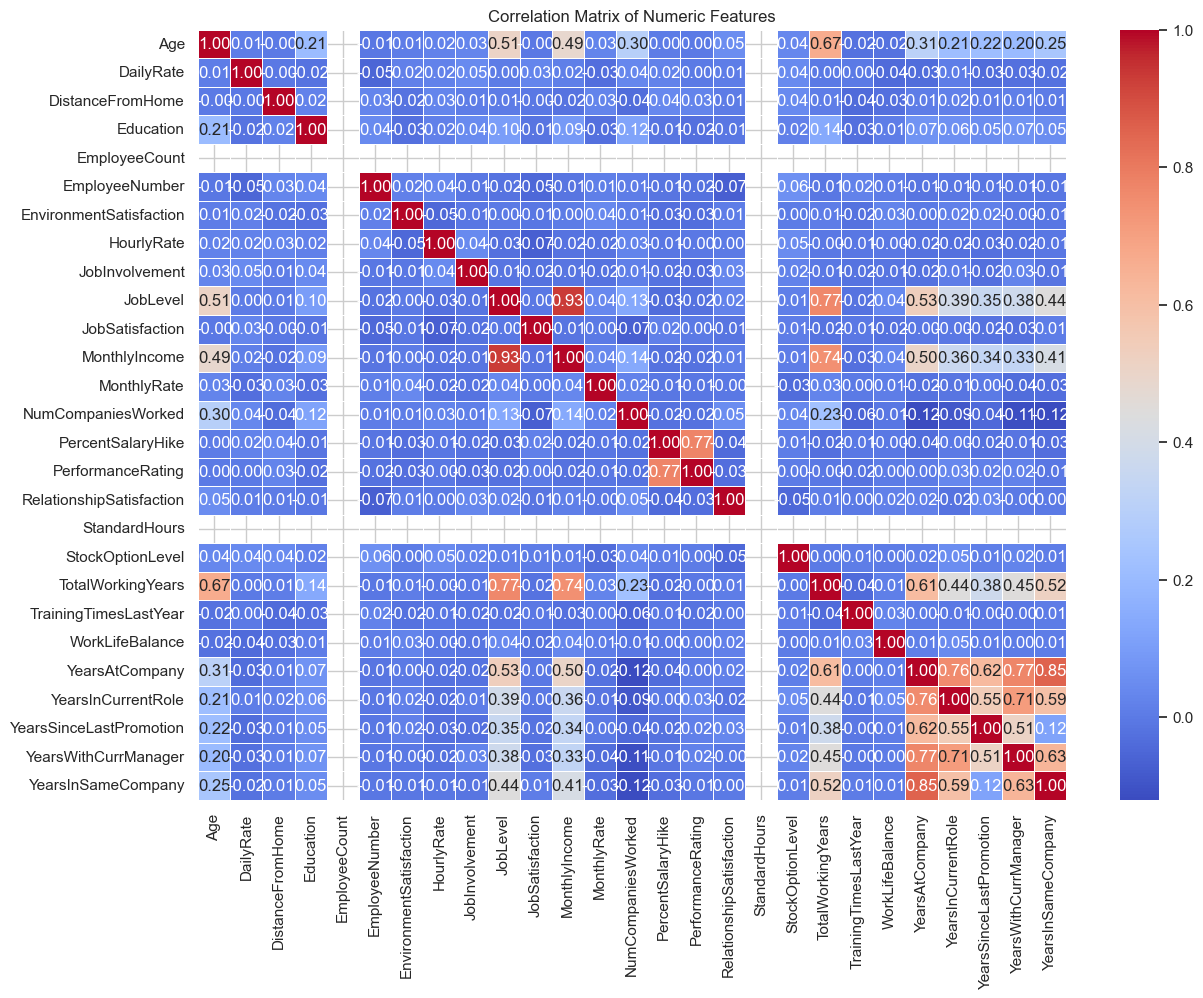

In [37]:
# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Conclusion (Correlation Analysis)

- MonthlyIncome, JobLevel, and TotalWorkingYears are strongly positively correlated — likely due to promotion and experience trends.
- YearsAtCompany and YearsWithCurrManager also show positive correlation, which may reflect managerial stability.
- No multicollinearity concerns, but feature selection should still be based on predictive power, not just correlation.

3.6 Statistical Summary

Descriptive statistics help summarize central tendency and spread of numerical features, and check for skewness or outliers.

In [38]:
# Summary statistics for numeric features
df_missing.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsInSameCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,80.0,0.793878,11.332378,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,4.820408
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,0.0,0.852077,7.619606,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,4.847756
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,4.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,36.000000


In [39]:
# Summary for categorical features
df_missing.describe(include='category')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1069,961,606,882,380,673,1470,1054


Conclusion (Statistical Summary)

- Summary statistics confirm that features like `MonthlyIncome` and `YearsAtCompany` have wide ranges and potential outliers.
- Satisfaction-related features like `JobSatisfaction`, `EnvironmentSatisfaction`, and `WorkLifeBalance` can offer valuable insights into attrition behavior.

4. Visualizations


In [40]:
sns.set(style="whitegrid")



1) Attrition trend by Age group (Bar plot)


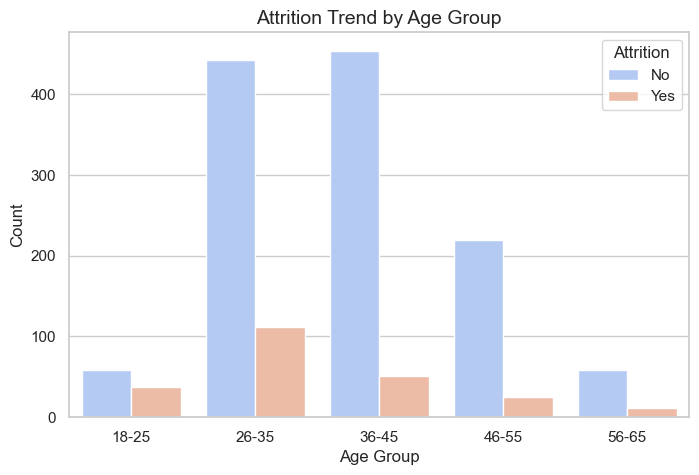

In [41]:
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-25', '26-35', '36-45', '46-55', '56-65']
df_missing['AgeGroup'] = pd.cut(df_missing['Age'], bins=age_bins, labels=age_labels, right=False)

plt.figure(figsize=(8,5))
sns.countplot(data=df_missing, x='AgeGroup', hue='Attrition', palette='coolwarm')
plt.title("Attrition Trend by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.show()

Younger employees show higher attrition rates, with a gradual decline in older age brackets.
This indicates that early-career stages may be more vulnerable to turnover.

2) Average Monthly Income by Job Role (Horizontal Bar plot)


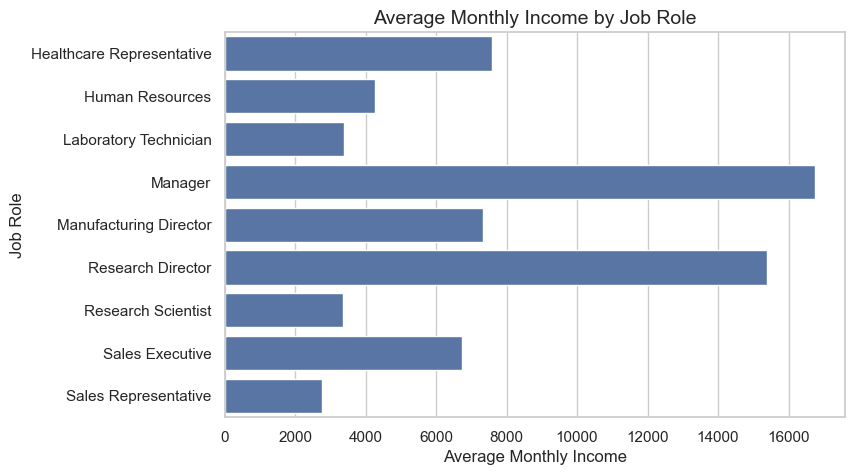

In [42]:
plt.figure(figsize=(8,5))
avg_income = df_missing.groupby('JobRole', observed=False)['MonthlyIncome'].mean().sort_values()
sns.barplot(x=avg_income.values, y=avg_income.index)
plt.title("Average Monthly Income by Job Role", fontsize=14)
plt.xlabel("Average Monthly Income")
plt.ylabel("Job Role")
plt.show()

Average Monthly Income by Job Role (Horizontal Bar Plot)
Managerial roles command the highest salaries, while entry-level positions remain at the lower end.
Income disparities may contribute to motivation and retention differences.

3) Attrition percentage by Marital Status (Pie chart)


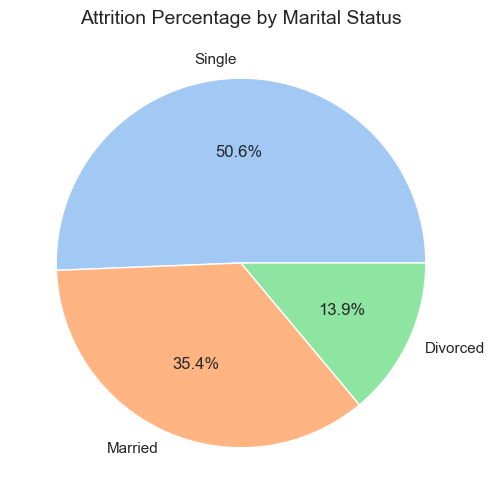

In [43]:
marital_counts = df_missing[df_missing['Attrition'] == 'Yes']['MaritalStatus'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Attrition Percentage by Marital Status", fontsize=14)
plt.show()

Attrition Percentage by Marital Status (Pie Chart)
Single employees form the largest proportion of attrition cases.
This may reflect lifestyle flexibility or lower personal commitments.

4)  Years at Company vs. Monthly Income (Scatter plot)


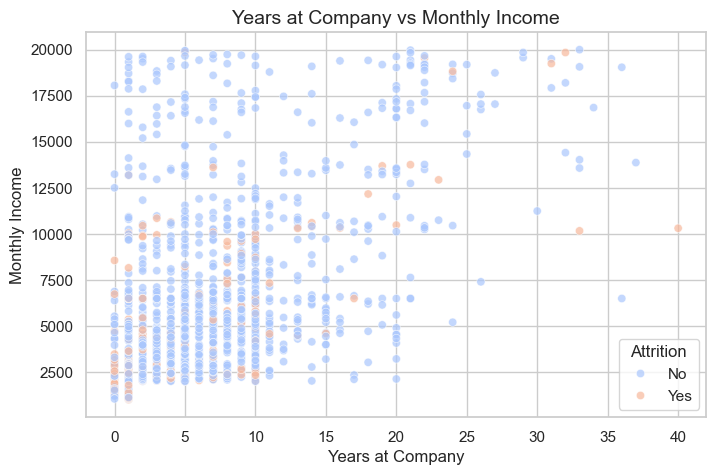

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_missing, x='YearsAtCompany', y='MonthlyIncome', hue='Attrition', palette='coolwarm', alpha=0.7)
plt.title("Years at Company vs Monthly Income", fontsize=14)
plt.xlabel("Years at Company")
plt.ylabel("Monthly Income")
plt.show()

Years at Company vs. Monthly Income (Scatter Plot)
Income generally rises with tenure, though outliers exist at both ends.
Attrition cases are more common among those with lower tenure and pay.

5) Attrition rate by Department and Gender (Clustered Bar plot)


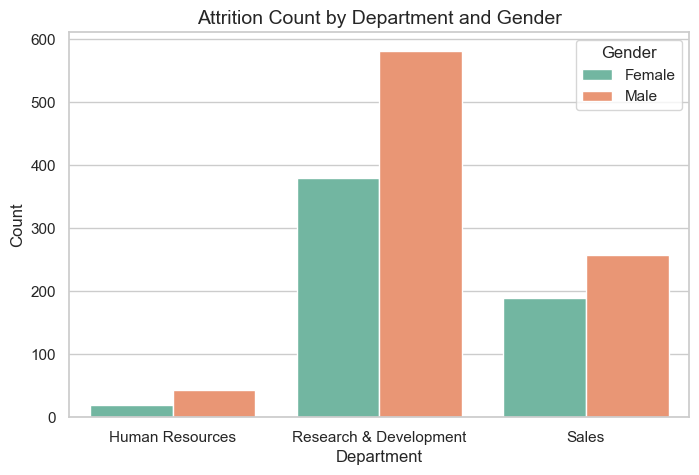

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_missing, x='Department', hue='Gender', palette='Set2')
plt.title("Attrition Count by Department and Gender", fontsize=14)
plt.xlabel("Department")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()

Attrition Rate by Department and Gender (Clustered Bar Plot)
Sales shows the highest attrition, with slightly more female attrition in certain departments.
This highlights department- and gender-specific retention challenges.

6) Violin Plot of Monthly Income by Job Role and Attrition Status



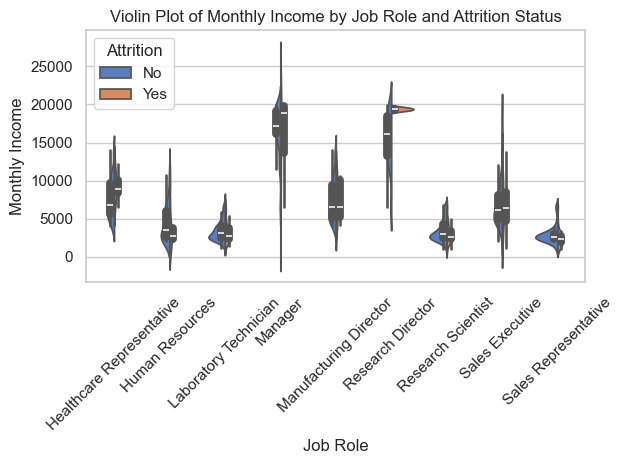

In [46]:
sns.violinplot(
    data=df_missing,
    x='JobRole',
    y='MonthlyIncome',
    hue='Attrition',
    split=True,
    palette='muted'
)
plt.xticks(rotation=45)
plt.title('Violin Plot of Monthly Income by Job Role and Attrition Status')
plt.ylabel('Monthly Income')
plt.xlabel('Job Role')
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

The violin plot shows that attrition is more common in lower to mid-paying roles, while higher-paying jobs have narrower salary ranges and lower attrition rates, suggesting pay may help retention in specific job categories.

7) Line chart of average satisfaction level vs. years at company


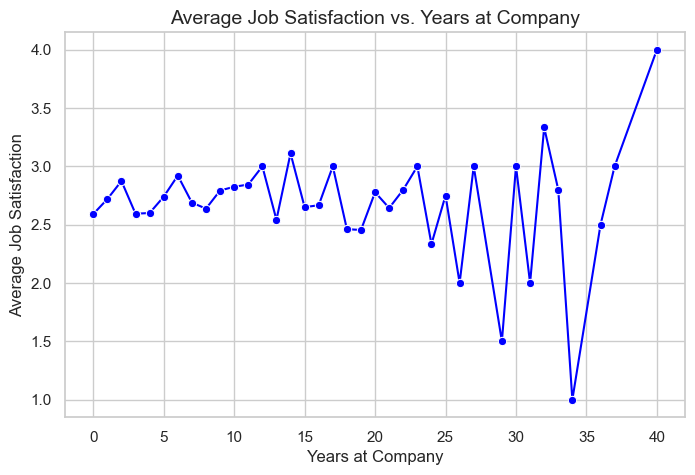

In [47]:
plt.figure(figsize=(8,5))
avg_satisfaction = df_missing.groupby('YearsAtCompany')['JobSatisfaction'].mean()
sns.lineplot(x=avg_satisfaction.index, y=avg_satisfaction.values, marker='o', color='blue')
plt.title("Average Job Satisfaction vs. Years at Company", fontsize=14)
plt.xlabel("Years at Company")
plt.ylabel("Average Job Satisfaction")
plt.show()

Satisfaction is highest in the first few years, then dips mid-career before stabilizing.
This trend may signal a need for engagement initiatives during the mid-tenure period.

Conclusion
This analysis on employee attrition in a pharmaceutical organization using the IBM HR Analytics dataset provided a comprehensive understanding of the factors influencing workforce turnover. By exploring demographic, financial, and job-related attributes through statistical summaries and targeted visualizations, we identified patterns that can guide data-driven HR strategies to reduce attrition and enhance employee satisfaction.                  Through advanced statistical exploration and targeted visualizations, we identified patterns across age, tenure, compensation, job roles, and satisfaction metrics.

The findings revealed that younger employees and those with shorter tenure were at the highest risk of leaving. Certain roles, notably Laboratory Technicians and Sales Representatives, experienced disproportionately higher attrition, while lower and mid-income positions showed greater turnover compared to high-paying roles. Non-monetary factors — including job satisfaction, work-life balance, and environment satisfaction — emerged as critical retention determinants. Department and gender-specific variations also indicated the need for tailored HR interventions.

Key Insights

Age and Tenure Matter
Attrition rates were highest among younger employees (below 30) and those with less than 3 years of tenure, suggesting early-career professionals are more likely to leave.

Job Roles Show Uneven Attrition Risks
Positions such as Laboratory Technician and Sales Representative experienced disproportionately higher attrition compared to Manager or Research Director roles.

Salary Disparities Influence Retention
Lower and mid-level income roles exhibited higher attrition rates, whereas higher-paying positions not only retained employees better but also showed narrower income variation.

Work-Life Balance and Satisfaction Indicators Are Crucial
Employees reporting low job satisfaction, poor work-life balance, or lower environment satisfaction were more likely to leave, even if salaries were competitive.

Intersection of Department and Gender
In some departments, such as Sales, female attrition was higher compared to males, while in others, attrition rates were similar across genders — suggesting department-specific culture or flexibility policies may play a role.

Recommendations:

Early-Career Retention Programs
Implement mentorship, skill development, and clear career progression paths for employees in their first 2–3 years.

Targeted Retention by Job Role
Focus retention initiatives on high-risk roles like Laboratory Technicians and Sales Representatives with competitive pay adjustments, role enrichment, or flexible work options.

Revisit Compensation Structures
Conduct salary benchmarking and adjust pay bands for roles with high attrition to remain competitive within the industry.

Boost Non-Monetary Engagement Factors
Invest in programs enhancing job satisfaction — such as flexible scheduling, wellness initiatives, and improved workplace culture.

Department-Specific Gender Inclusion Policies
Analyze department-level attrition by gender to introduce tailored policies addressing unique needs, improving diversity retention.